In [13]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import keras

In [14]:
# Kontrola, aky na akom backende je keras library zalozena - je to tensorflow
keras.backend.backend()

'tensorflow'

In [15]:
# Importujeme si nas fashion dataset priamo z keras datasetov
# (kedze keras priamo disponuje tymto datasetom)
from keras.datasets import fashion_mnist

In [16]:
# Metoda load_data() vrati dvojicu (x_train, y_train) a (x_test, y_test), kde
# x_train a x_test su polia, ktore obsahuju data ciernobielych obrazkov s
# tvarom (shape) - (pocet_obrazkov, 28, 28), kde 28 a 28 je pocet pixelov
# na obrazok -> 1 obrazok ma 28x28 pixelov

# y_train a y_test su polia oznaceni / labelov od 0 po 9, ktore symbolizuju
# typ konkretneho oblecenia. Napr. 0 - tricko, 1 - nohavice, 2 - pulover, ...
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [17]:
# Cize trenovacia mnozina podla modelu vyssie obsahuje 60000 obrazkov / mnozin
# pixelov, kde kazdy obrazok ma vysku 28px a sirku 28px
x_train.shape

(60000, 28, 28)

In [18]:
# Tu vidime, ze mnozina, na ktorej budeme testovat / predikovat / klasifikovat
# nazov alebo typ oblecenia podla daneho obrazku obsahuje
# 10000 obrazkov / mnozin pixelov, kazdy s vyskou 28px a sirkou 28px
x_test.shape

(10000, 28, 28)

In [19]:
# Mozeme si ukazat, ako napriklad vyzera prvy obrazok v nasom trenovacom
# datasete, lenze tu je treba poznamenat, ze je v tvare matice s velkostou
# 28x28, ktora je zlozena z celych nezapornych 8-bitovych cisel, ktore su
# od 0 - 255, co symbolizuje svetlost / tmavost daneho pixelu. Cize 
# cez takyto vypis si velmi nevieme predstavit ako obrazok bude realne vyzerat

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

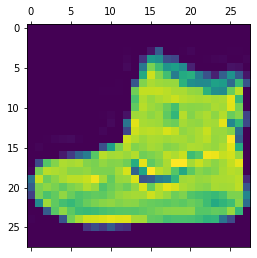

In [8]:
# Na druhu stranu, kniznica matplotlib ponuka funkciu matshow(), ktora dokaze
# zobrazit takuto maticu vo vizualne privetivejsom "grafe" a takymto sposobom
# uz vieme obrazok ovela lepsie identifikovat. Vidime, ze na prvom obrazku
# datasetu sa nachadza pravdepodobne topanka.

plt.matshow(x_train[0])

In [9]:
# Kedze klasifikacia bude prebiehat tak, ze k danemu obrazku bude priradene
# cislo / label od 0 - 9 (0 - tielko, 1 - nohavice, 2 - pulover, ...),
# mozme si prave k tomuto obrazku vypisat aj korespondujuce cislo / label,
# ktory sa samozrejme nachadza v mnozine y_train. Vidime, ze tato konkretna
# topanka, ma label 9

y_train[0]

9

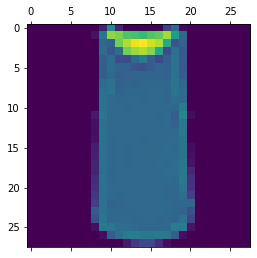

In [10]:
# Mozeme sa pozriet aj na ine obrazky podobnym sposobom

plt.matshow(x_train[2])

In [11]:
# Tento obrazok znazornuje tielko a jeho identifikacne cislo / label je 0

y_train[2]

0

In [21]:
# Normalizacia datasetu

x_train = x_train / 255
x_test = x_test / 255

In [22]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [25]:
# Vytvorenie modelu a pridanie layerov

model = Sequential()

# Pridanie INPUT layer, Flatten konvertuje 2D pole na 1D pole
model.add(Flatten(input_shape = [28, 28]))

# Pridanie HIDDEN layer, specifikujeme nejaky pocet neuronov (subjektivne) a zaroven pridame aktivacnu funckiu
# V nasom pripade aktivacna funkcia bude 'relu'
model.add(Dense(20, activation = 'relu'))

# Pridanie OUPUT layer, bude ich 10, pretoze mame 10 kategorii oblecenia / moznych vysledkov
# Aktivacna funkcia softmax urobi distribuciu mnoziny cisel na mnozinu pravdepodobnosti
model.add(Dense(10, activation = 'softmax'))

In [26]:
# Model ma funkciu summary(), ktora nam ukaze, ako vyzera nasa neuronova siet
# V nasom pripade vidime, ze mame 784 INPUT neuronov, 20 HIDDEN neuronov a 10 OUTPUT neuronov - OUTPUT SHAPE

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])